In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
nba_df = pd.read_csv("nba_data_full.csv")
nba_df.head()

,season,team_abbreviation,age,player_height,player_weight,po_year,team_full,playoffs,year_team,Team,...,OppPtsSeason,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,PtsDiff
0,1997-98,ATL,28.250000,199.231250,99.166551,1998,Atlanta Hawks,True,1998_Atlanta Hawks,Atlanta,...,92.3,42.8,19.0,8.0,5.9,14.0,20.5,29.5,13.4,3.6
1,1997-98,BOS,25.857143,200.297143,95.027524,1998,Boston Celtics,False,1998_Boston Celtics,Boston,...,98.5,39.5,22.1,12.0,4.5,15.6,26.9,24.9,14.6,-2.6
2,1997-98,CHH,29.733333,200.829333,101.755805,1998,Charlotte Hornets,True,1998_Charlotte Hornets,Charlotte,...,94.6,40.1,23.4,8.2,3.7,14.4,21.4,28.4,11.7,2.0
3,1997-98,CHI,30.600000,201.337333,103.691131,1998,Chicago Bulls,True,1998_Chicago Bulls,Chicago,...,89.6,44.1,23.1,8.6,4.3,13.0,21.1,29.2,14.9,7.1
4,1997-98,CLE,26.375000,199.231250,96.756844,1998,Cleveland Cavaliers,True,1998_Cleveland Cavaliers,Cleveland,...,89.8,39.8,22.9,9.9,5.0,16.6,23.7,28.2,11.6,2.7


## Classification

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [37]:
indep_vars = ['age','player_height','player_weight','Ast','Stl','Blk','To','Pf','Dreb','Oreb']
X_df = nba_df[indep_vars].copy()
dep_var_cls = 'playoffs'
y_df = nba_df[[dep_var_cls]].copy()

In [38]:
y_df = y_df.apply(lambda x: int(x), axis=1)
y_df

0      1
1      0
2      1
3      1
4      1
      ..
678    0
679    0
680    1
681    1
682    0
Length: 683, dtype: int64

In [39]:
# Normalize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
def scale_df(df):
    mat_norm = sc.fit_transform(df)
    # Convert back to DataFrame, add the feature names back in
    df_norm = pd.DataFrame(mat_norm, columns=sc.feature_names_in_)
    return df_norm

In [40]:
X_df_norm = scale_df(X_df)

In [41]:
#X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_df_norm, y_df, stratify=y_df)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_df_norm, y_df, stratify=y_df)

In [42]:
clf = MLPClassifier(max_iter=1000)
clf.fit(X_train_cls, y_train_cls)

C:\Users\jpjac\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=1000)

In [43]:
clf.predict_proba(X_test_cls[:1])

array([[0.05490549, 0.94509451]])

In [44]:
clf.predict(X_test_cls[:5])

array([1, 1, 1, 1, 0], dtype=int64)

In [45]:
clf.score(X_test_cls, y_test_cls)

0.7426900584795322

But... is this good? How do we know?

## Regression

In [46]:
from sklearn.neural_network import MLPRegressor

In [47]:
# (Temp: drop NA vals)
nba_df = nba_df[~pd.isna(nba_df['PtsDiff'])].copy()

In [48]:
indep_vars = ['age','player_height','player_weight','Ast','Stl','Blk','To','Pf','Dreb','Oreb']
dep_var_reg = 'PtsDiff'
reg_vars = indep_vars + [dep_var_reg]
reg_df = nba_df[reg_vars].copy()
# And normalize
reg_df_norm = scale_df(reg_df)

In [49]:
X_df_norm = reg_df_norm[indep_vars].copy()
y_df_norm = reg_df_norm[[dep_var_reg]].copy()

In [50]:
y_arr_norm = np.ravel(y_df_norm)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_df_norm, y_arr_norm, random_state=1948)

In [52]:
regr = MLPRegressor(random_state=1948, activation='relu',
                    hidden_layer_sizes=(150,100,50), alpha=0.001,
                    solver='adam')
regr.fit(X_train, y_train)

MLPRegressor(alpha=0.001, hidden_layer_sizes=(150, 100, 50), random_state=1948)

In [53]:
print(regr.predict(X_test))

[ 1.13061178 -1.44763008  0.02931355  0.17258539  0.06459978  0.76569459
  1.09521514 -0.71060119  0.54038262 -0.32222047  0.1509815   0.26659583
  1.42064842  2.04476356  0.75889651 -1.33639879 -0.06833318  0.61495839
  0.53083999 -1.04854038 -0.58985212  0.16483921  0.79469319 -1.14128457
 -0.45690545 -0.49142257  0.36908376  1.06964268  0.29074619 -0.59779716
  0.13095505  1.24685683 -0.1129899  -0.42571846  0.80596749 -0.06344921
 -0.92346574  1.3233343  -0.84035682  2.10449351 -0.41182766  0.51437113
  0.34113647  0.8223441  -0.08982279 -2.16666814  0.26771334  1.35227093
  0.12375109  0.25158234  1.07737542 -0.32931541  0.90782126  0.15140961
  1.37020187  1.06669633 -0.34871836  0.04382657 -1.64336717 -1.47909391
  0.56242806  0.73927229 -0.42934386  1.37304597  0.94232962 -0.27868606
 -0.30534609  1.84310434 -0.60470619 -0.40563027 -1.48894984  0.95301507
 -1.74555382 -0.25459696 -1.26953673  0.63163437  0.0623186   1.51069005
 -0.97378741  1.34392672  1.8488918   0.19818222 -1

In [54]:
regr.score(X_test, y_test)

0.26856472325250247

In [55]:
nba_df.mean(numeric_only=True)

age                27.158277
player_height     200.832320
player_weight     100.707038
po_year          2009.081991
playoffs            0.538799
PtsSeason          99.575695
OppPtsSeason       99.571889
Reb                42.402635
Ast                21.786384
Stl                 7.635578
Blk                 4.910542
To                 13.942899
Pf                 21.308492
Dreb               31.131772
Oreb               11.271889
PtsDiff             0.003807
dtype: float64

In [56]:
#fake_x = {'age': [nba_df['age'].mean()], 'player_height': [190], 'player_weight': [100]}
fake_x = nba_df.mean(numeric_only=True)
fake_df = pd.DataFrame(fake_x)
fake_df = fake_df.transpose()
fake_df.drop(columns=[c for c in fake_df.columns if c not in indep_vars], inplace=True)
fake_df

,age,player_height,player_weight,Ast,Stl,Blk,To,Pf,Dreb,Oreb
0,27.158277,200.83232,100.707038,21.786384,7.635578,4.910542,13.942899,21.308492,31.131772,11.271889


In [57]:
def unnormalize_prediction(pred_norm):
    return pred_norm * y_df.std() + y_df.mean()

pred_raw = regr.predict(fake_df)
pred = unnormalize_prediction(pred_raw)
pred

array([-7.98938046])

<AxesSubplot:xlabel='player_height', ylabel='PtsDiff'>

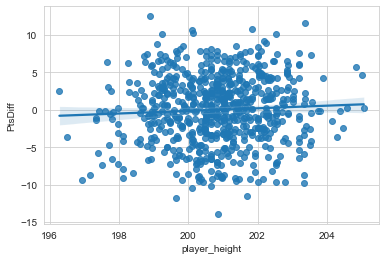

In [58]:
sns.regplot(data=nba_df, x='player_height', y='PtsDiff')

<AxesSubplot:xlabel='age', ylabel='PtsDiff'>

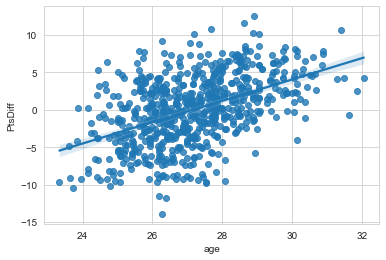

In [59]:
sns.regplot(data=nba_df, x='age', y='PtsDiff')

In [60]:
from scipy.stats import pearsonr
import itertools

In [61]:
nba_df

,season,team_abbreviation,age,player_height,player_weight,po_year,team_full,playoffs,year_team,Team,...,OppPtsSeason,Reb,Ast,Stl,Blk,To,Pf,Dreb,Oreb,PtsDiff
0,1997-98,ATL,28.250000,199.231250,99.166551,1998,Atlanta Hawks,True,1998_Atlanta Hawks,Atlanta,...,92.3,42.8,19.0,8.0,5.9,14.0,20.5,29.5,13.4,3.6
1,1997-98,BOS,25.857143,200.297143,95.027524,1998,Boston Celtics,False,1998_Boston Celtics,Boston,...,98.5,39.5,22.1,12.0,4.5,15.6,26.9,24.9,14.6,-2.6
2,1997-98,CHH,29.733333,200.829333,101.755805,1998,Charlotte Hornets,True,1998_Charlotte Hornets,Charlotte,...,94.6,40.1,23.4,8.2,3.7,14.4,21.4,28.4,11.7,2.0
3,1997-98,CHI,30.600000,201.337333,103.691131,1998,Chicago Bulls,True,1998_Chicago Bulls,Chicago,...,89.6,44.1,23.1,8.6,4.3,13.0,21.1,29.2,14.9,7.1
4,1997-98,CLE,26.375000,199.231250,96.756844,1998,Cleveland Cavaliers,True,1998_Cleveland Cavaliers,Cleveland,...,89.8,39.8,22.9,9.9,5.0,16.6,23.7,28.2,11.6,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,2019-20,SAC,25.117647,199.763529,98.242691,2020,Sacramento Kings,False,2020_Sacramento Kings,Sacramento,...,112.1,42.6,23.8,7.7,4.1,13.7,22.2,32.9,9.7,-2.0
679,2019-20,SAS,25.750000,199.390000,99.223250,2020,San Antonio Spurs,False,2020_San Antonio Spurs,San Antonio,...,115.2,44.6,24.7,7.3,5.5,12.2,19.4,35.6,9.0,-1.1
680,2019-20,TOR,25.555556,198.261111,96.539497,2020,Toronto Raptors,True,2020_Toronto Raptors,Toronto,...,106.5,45.3,25.2,8.6,5.0,13.8,21.8,36.0,9.3,6.3
681,2019-20,UTA,25.666667,196.285556,98.353865,2020,Utah Jazz,True,2020_Utah Jazz,Utah,...,108.8,44.6,22.3,6.1,4.0,14.2,20.3,35.4,9.1,2.5


In [62]:
correlations = {}
numeric_cols = [c for c in nba_df.columns if c not in ["season","team_abbreviation","team_full","year_team","Team"]]

for col_a, col_b in itertools.combinations(numeric_cols, 2):
    correlations[col_a + '__' + col_b] = pearsonr(nba_df.loc[:, col_a], nba_df.loc[:, col_b])

result = pd.DataFrame.from_dict(correlations, orient='index')
result.columns = ['PCC', 'p-value']
result.sort_values(by='PCC', ascending=False)

,PCC,p-value
playoffs__PtsDiff,0.774277,1.907335e-137
Reb__Dreb,0.769030,1.750770e-134
PtsSeason__OppPtsSeason,0.753230,5.131707e-126
PtsSeason__Dreb,0.703603,3.902512e-103
po_year__Dreb,0.689296,2.108701e-97
...,...,...
Pf__Dreb,-0.399838,1.317915e-27
Dreb__Oreb,-0.440835,7.652780e-34
po_year__Pf,-0.479731,1.333234e-40
age__OppPtsSeason,-0.510134,1.591817e-46


<AxesSubplot:xlabel='age', ylabel='PtsDiff'>

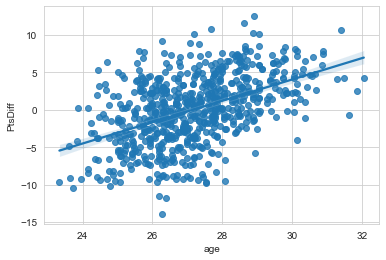

In [63]:
sns.regplot(data=nba_df, x='age', y='PtsDiff')

<AxesSubplot:xlabel='To', ylabel='PtsDiff'>

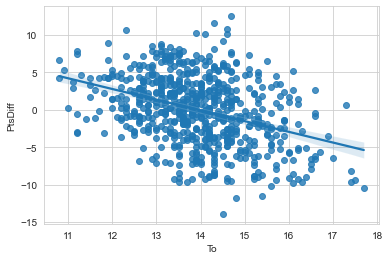

In [64]:
sns.regplot(data=nba_df, x='To', y="PtsDiff")